In [4]:
from hmf import MassFunction
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,LogLocator, AutoMinorLocator)

import numpy as np
%matplotlib inline
mf = MassFunction()
km = 1.e5; G = 6.67e-8;
h = .677; Mpc = 3.e24; Ms = 2.e33
3.e4*(km/Mpc)**2/(8*np.pi*G)

1.98844256736501e-29

In [5]:
# help(MassFunction)

In [6]:
def Tv(Mh,z):
    alpha_T = 2.324e4
    return alpha_T * (Mh/1.e8)**(2./3.) *  (1+z)/11.

# def 

In [7]:
MassFunction.get_all_parameter_defaults(recursive=False)

{'cosmo_model': FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486),
 'cosmo_params': {},
 'n': 0.9667,
 'sigma_8': 0.8159,
 'growth_params': {},
 'lnk_min': -18.420680743952367,
 'lnk_max': 9.903487552536127,
 'dlnk': 0.05,
 'z': 0.0,
 'transfer_model': hmf.density_field.transfer_models.CAMB,
 'transfer_params': {},
 'takahashi': True,
 'growth_model': hmf.cosmology.growth_factor.GrowthFactor,
 'hmf_model': hmf.mass_function.fitting_functions.Tinker08,
 'Mmin': 10,
 'Mmax': 15,
 'dlog10m': 0.01,
 'mdef_model': None,
 'mdef_params': {},
 'delta_c': 1.686,
 'hmf_params': {},
 'filter_model': hmf.density_field.filters.TopHat,
 'filter_params': {},
 'disable_mass_conversion': True}

In [8]:
Msun = 2.e33; h=.677; Mpc = 3.e24
mf.mean_density0 # in Ms hubble**2 / Mpc**3
print(mf.mean_density0*Ms*(h*h)/pow(Mpc,3), 1.9e-29*(h**2))
# print(1.9e-29*(h**2))

2.897403598881738e-30 8.708251e-30


In [9]:
rho_0 = mf.mean_density0*Ms*(h*h)/pow(Mpc,3)
G = 6.67e-8; H0 = 67.7*1.e5/3.e24
3.*(H0**2)/(8*np.pi*G)*.307

2.7978779429155605e-30

## halo mass function: 
### halo numbers in $d\log_{10} m =1$ range

10000 0.0001
11.0
9.872e-04


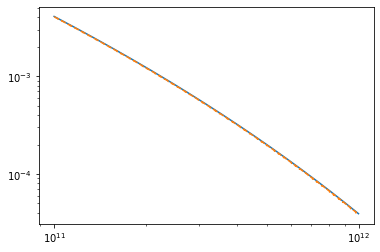

In [10]:
zz = 6
dlog10m = 0.0001
log10Mmin = 11+np.log10(h)
log10Mmax = 12+np.log10(h)
mf= MassFunction(hmf_model='ST',transfer_model='EH',z=zz,Mmin=log10Mmin,Mmax=log10Mmax,dlog10m=dlog10m,growth_model='Carroll1992')
# mf= MassFunction(hmf_model='ST',z=zz,Mmin=log10Mmin,Mmax=log10Mmax,dlog10m=dlog10m,growth_model='Carroll1992')

x, y = mf.m/h,mf.dndlog10m*h**3
print(len(x),mf.dlog10m)
plt.plot(x,y)

T = ascii.read('../data/dnSTdM_z6cpp.txt', delimiter=' ')
plt.loglog(T['M'], T['n_ST'], '--', label=str(zz)+'_cpp');
plt.xscale('log')
plt.yscale('log')

print('{0:.1f}'.format(np.log10(x[0])))
print('{0:.3e}'.format(np.sum(y*mf.dlog10m)))
# mass ranges: [11,12,13(to 14 or 15)]
# halo numbers: [9.87e-4, 6.15e-6, 8.92e-10]

6.0
3.391e+01


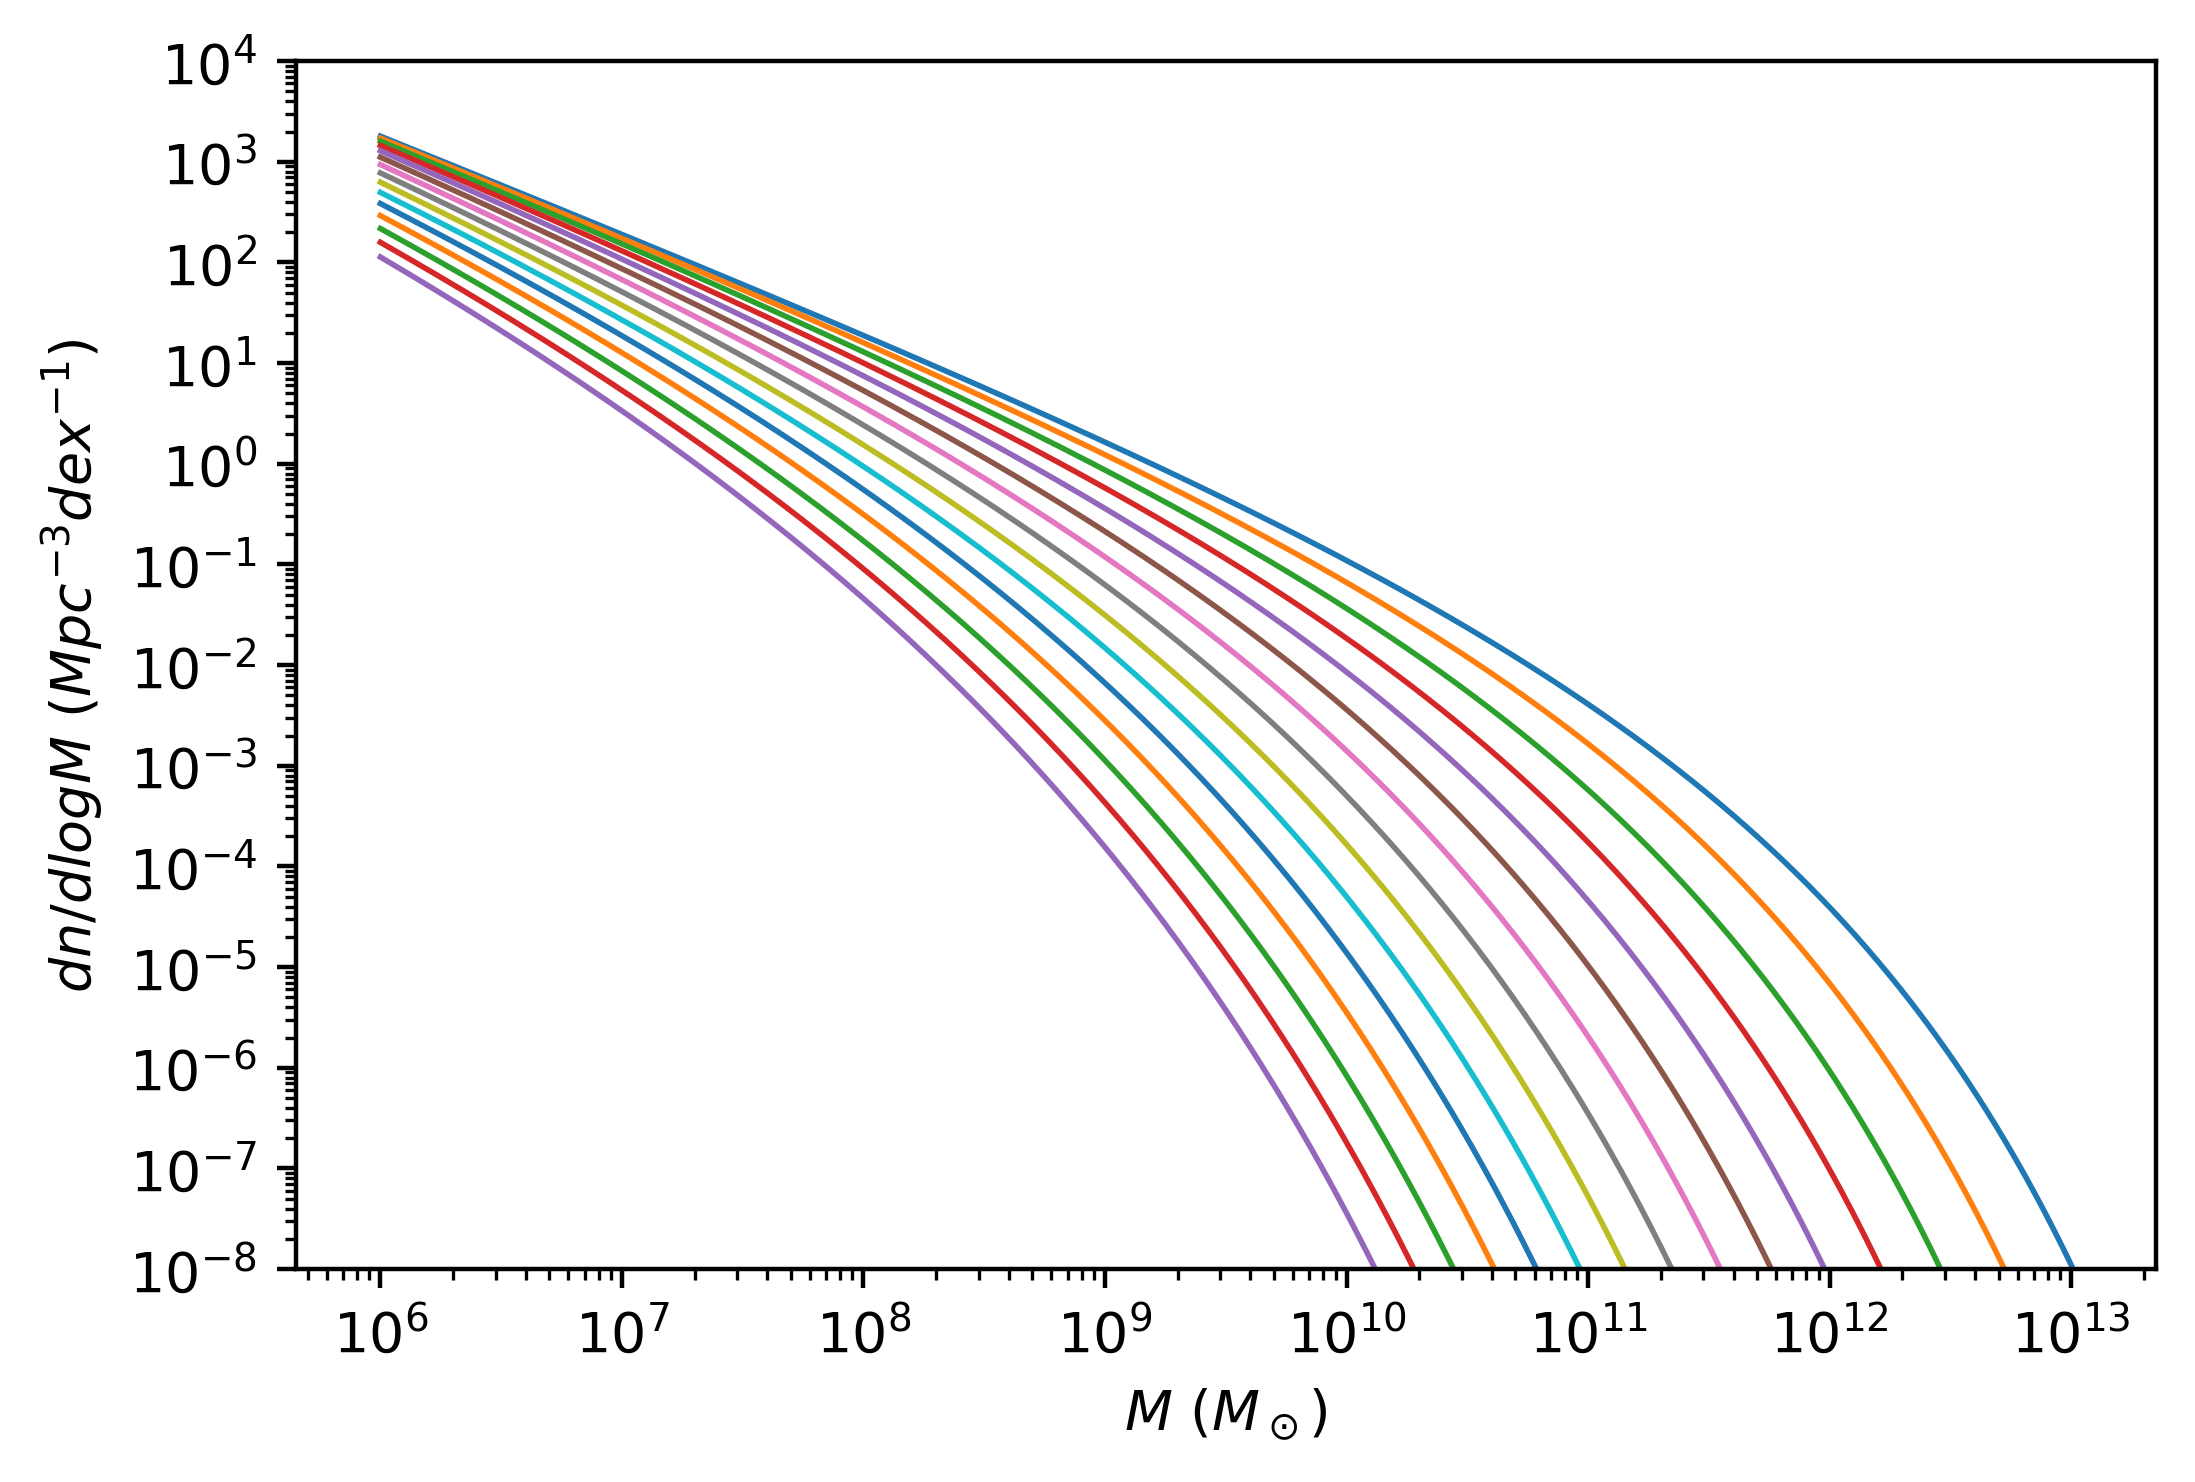

In [11]:
dlog10m = 0.01
log10Mmin = 6+np.log10(h)
log10Mmax = 13+np.log10(h)
zs = np.arange(6,21,1)
ys = []

fig, ax = plt.subplots(1, 1, dpi=400)

fname = '../hmf.dat'
# print(ys)
with open(fname,'w') as f:
    f.write('# Mh \t z6 \t 7 \t 8 \t 9 \t 10 \t 11 \t 12 \t 13 \t 14 \t 15 \t 16 \t 17 \t 18 \t 19 \t 20\n')
    for zz in zs:
        mf= MassFunction(hmf_model='ST',transfer_model='EH',z=zz,Mmin=log10Mmin,Mmax=log10Mmax,dlog10m=dlog10m,growth_model='Carroll1992')
        x, y = mf.m/h,mf.dndlog10m*h**3
        ax.plot(x,y,linewidth=1)
        
        if zz==6:
            ys.append(x)
        ys.append(y)
#     print(ys)
    np.savetxt(f, np.array(ys).transpose(), fmt = '%10.3e')


# fname = '../hmf.dat'
# # print(ys)
# print(np.array(ys).transpose())
# with open(fname,'w') as f:
#     f.write('# Mh \t z6 \t 7 \t 8 \t 9 \t 10 \t 11 \t 12 \t 13 \t 14 \t 15 \t 16 \t 17 \t 18 \t 19 \t 20\n')
#     np.savetxt(f, [np.array(ys)], fmt = '%10.3e')
# #     [zs, np.array(ys).transpose()] , fmt='%10.3e')
# print(len(x),len(ys[0]),mf.dlog10m)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-12,1e4)
ax.set_ylim(1e-8,1e4)
locmajy = LogLocator(base=10,numticks=100) 
locminy = LogLocator(base=10,subs=np.arange(2, 10) * .1,numticks=100) # subs=(0.2,0.4,0.6,0.8)
ax.yaxis.set_major_locator(locmajy)
ax.yaxis.set_minor_locator(locminy)
ax.set_xlabel(r'$M~(M_\odot)$')
# '^{-3}dex^{-1})$')
ax.set_ylabel(r'$dn/dlogM~(Mpc^{-3}dex^{-1})$')
fig.savefig('../hmf.png')

print('{0:.1f}'.format(np.log10(x[0])))
print('{0:.3e}'.format(np.sum(y*mf.dlog10m)))
# mass ranges: [11,12,13(to 14 or 15)]
# halo numbers: [9.87e-4, 6.15e-6, 8.92e-10]

6.0
9.357e+01


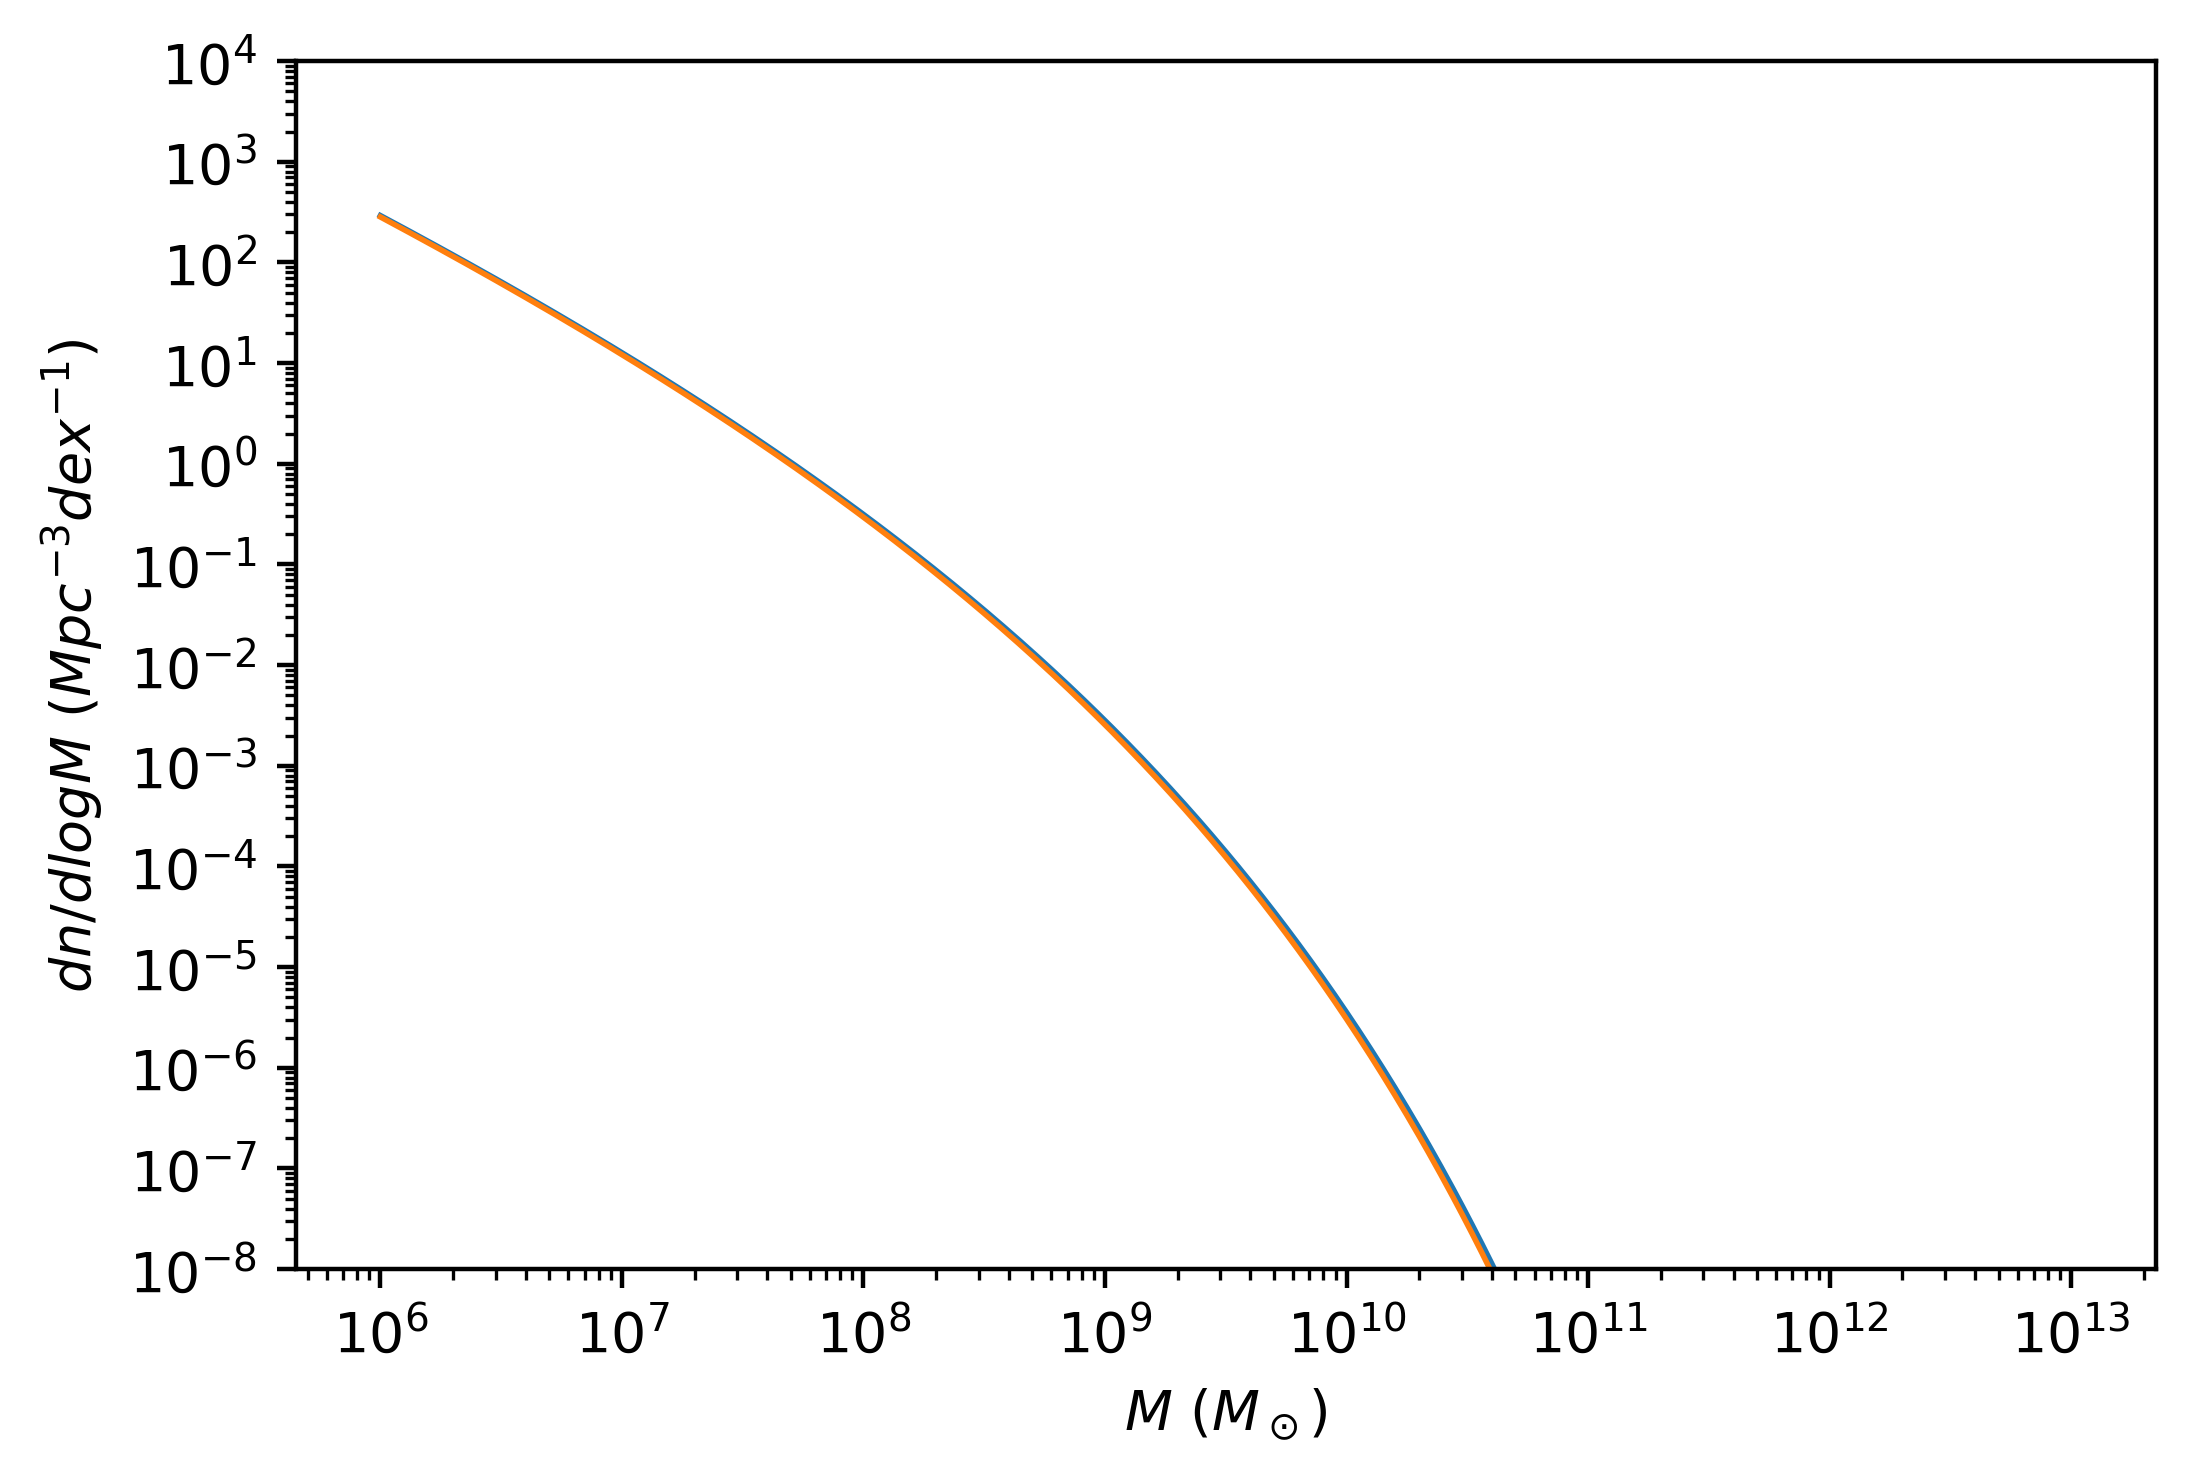

In [12]:
dlog10m = 0.01
log10Mmin = 6+np.log10(h)
log10Mmax = 13+np.log10(h)
zs = np.arange(6,21,1)
zs = [17]
ys = []

fig, ax = plt.subplots(1, 1, dpi=400)

fname = '../hmf.dat'
# print(ys)
with open(fname,'w') as f:
#     f.write('# Mh \t z6 \t 7 \t 8 \t 9 \t 10 \t 11 \t 12 \t 13 \t 14 \t 15 \t 16 \t 17 \t 18 \t 19 \t 20\n')
    for zz in zs:
        mf= MassFunction(hmf_model='ST',transfer_model='EH',z=zz,Mmin=log10Mmin,Mmax=log10Mmax,dlog10m=dlog10m,growth_model='Carroll1992')
        x, y = mf.m/h,mf.dndlog10m*h**3
        ax.plot(x,y,linewidth=1)
        mf= MassFunction(hmf_model='ST',sigma_8=0.811,transfer_model='EH',z=zz,Mmin=log10Mmin,Mmax=log10Mmax,dlog10m=dlog10m,growth_model='Carroll1992')
        x, y = mf.m/h,mf.dndlog10m*h**3
        ax.plot(x,y,linewidth=1)
        
    
# fname = '../hmf.dat'
# # print(ys)
# print(np.array(ys).transpose())
# with open(fname,'w') as f:
#     f.write('# Mh \t z6 \t 7 \t 8 \t 9 \t 10 \t 11 \t 12 \t 13 \t 14 \t 15 \t 16 \t 17 \t 18 \t 19 \t 20\n')
#     np.savetxt(f, [np.array(ys)], fmt = '%10.3e')
# #     [zs, np.array(ys).transpose()] , fmt='%10.3e')
# print(len(x),len(ys[0]),mf.dlog10m)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-12,1e4)
ax.set_ylim(1e-8,1e4)
locmajy = LogLocator(base=10,numticks=100) 
locminy = LogLocator(base=10,subs=np.arange(2, 10) * .1,numticks=100) # subs=(0.2,0.4,0.6,0.8)
ax.yaxis.set_major_locator(locmajy)
ax.yaxis.set_minor_locator(locminy)
ax.set_xlabel(r'$M~(M_\odot)$')
# '^{-3}dex^{-1})$')
ax.set_ylabel(r'$dn/dlogM~(Mpc^{-3}dex^{-1})$')
fig.savefig('../hmf.png')

print('{0:.1f}'.format(np.log10(x[0])))
print('{0:.3e}'.format(np.sum(y*mf.dlog10m)))
# mass ranges: [11,12,13(to 14 or 15)]
# halo numbers: [9.87e-4, 6.15e-6, 8.92e-10]

6.0
3.391e+01


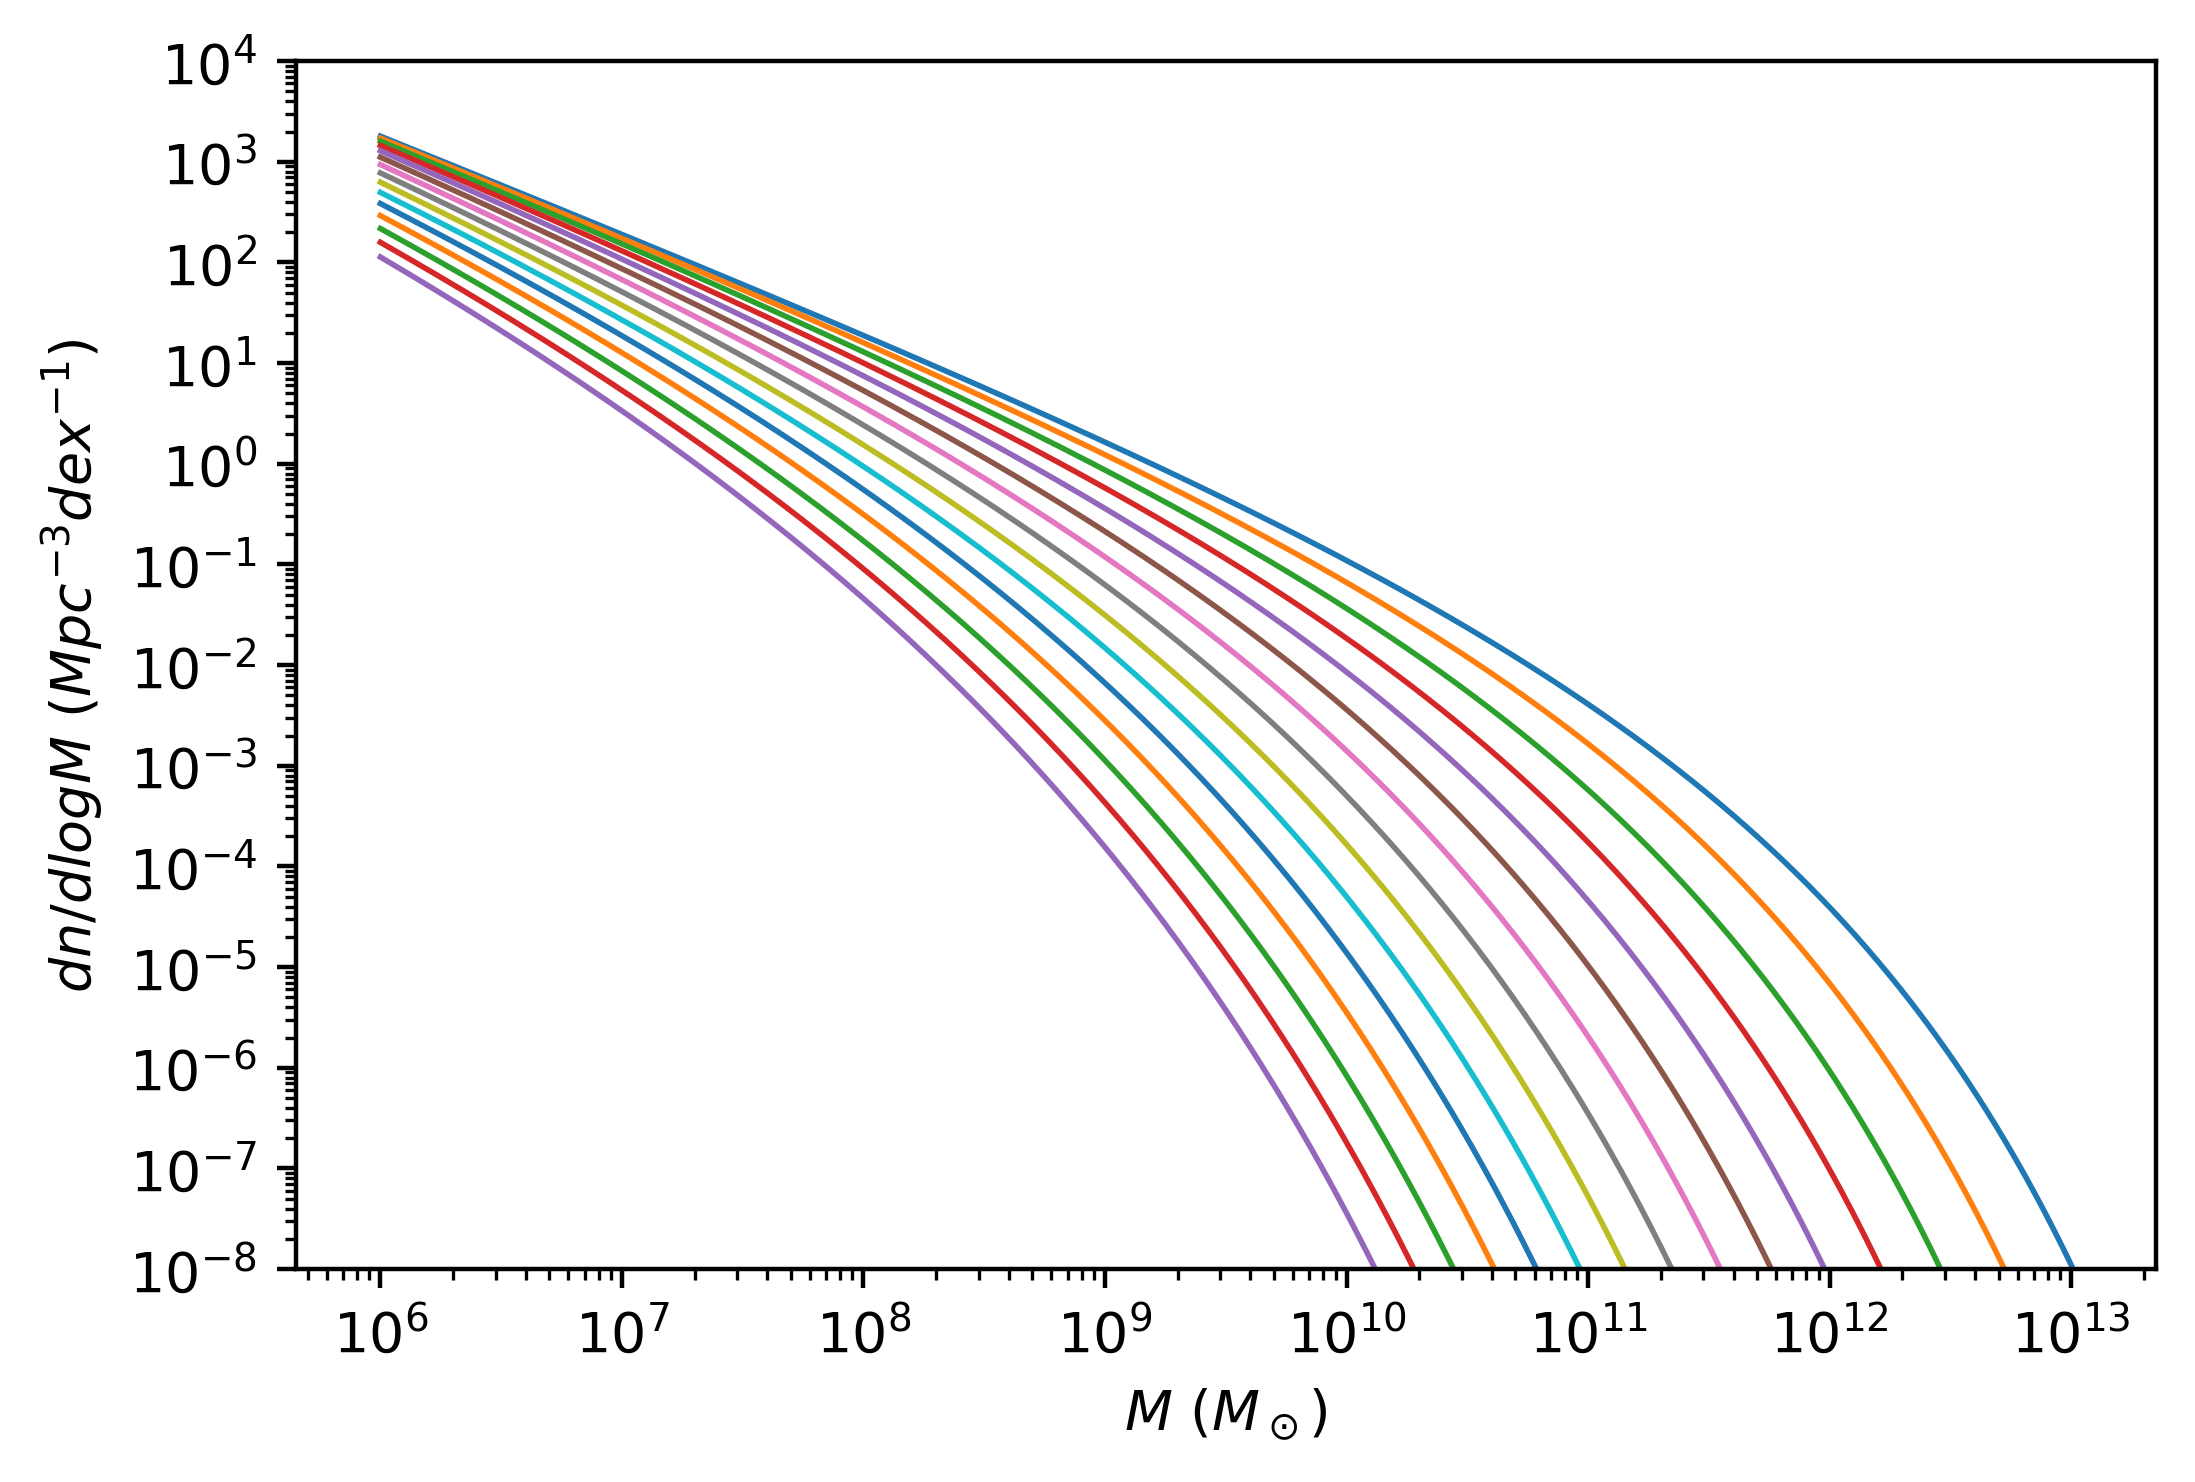

In [14]:
dlog10m =  0.01
log10Mmin = 6+np.log10(h)
log10Mmax = 13+np.log10(h)
zs = np.arange(6,21,1)
ys = []

fig, ax = plt.subplots(1, 1, dpi=400)

t = Table()

myDict = {}
set(['z%d' for zz in zs])
myDict
for zz in zs:
    mf= MassFunction(hmf_model='ST',transfer_model='EH',z=zz,Mmin=log10Mmin,Mmax=log10Mmax,dlog10m=dlog10m,growth_model='Carroll1992')
    x, y = mf.m/h,mf.dndlog10m*h**3
    ax.plot(x,y,linewidth=1)
    ys.append(y)
    t['Mh'] = x
    t['z%d'%zz] = y

fname = '../hmf.dat'
namedict = dict.fromkeys(['z%d'%zz for zz in zs], '10.3e')
namedict.update(dict.fromkeys(['Mh'], '10.3e'))
# print(namedict); exit(0)
ascii.write(t,fname,formats=namedict,overwrite=True)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-12,1e4)
ax.set_ylim(1e-8,1e4)
locmajy = LogLocator(base=10,numticks=100) 
locminy = LogLocator(base=10,subs=np.arange(2, 10) * .1,numticks=100) # subs=(0.2,0.4,0.6,0.8)
ax.yaxis.set_major_locator(locmajy)
ax.yaxis.set_minor_locator(locminy)
ax.set_xlabel(r'$M~(M_\odot)$')
# '^{-3}dex^{-1})$')
ax.set_ylabel(r'$dn/dlogM~(Mpc^{-3}dex^{-1})$')
fig.savefig('../hmf.png')

print('{0:.1f}'.format(np.log10(x[0])))
print('{0:.3e}'.format(np.sum(y*mf.dlog10m)))
# mass ranges: [11,12,13(to 14 or 15)]
# halo numbers: [9.87e-4, 6.15e-6, 8.92e-10]